# Dependencias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
data = pd.read_csv("./empleo_nacion/empleos_bsas_202303300007.csv")

In [3]:
data.head()

,fecha,departamento,provincia,clase,puestos
0,2014-01-01,CABA,CABA,"Agricultura, ganadería, caza y servicios relac...",5443
1,2014-01-01,CABA,CABA,Silvicultura y explotación forestal,119
2,2014-01-01,CABA,CABA,Pesca y acuicultura,581
3,2014-01-01,CABA,CABA,Extracción de carbón y lignito,24
4,2014-01-01,CABA,CABA,Extracción de petróleo crudo y gas natural,4145


In [4]:
# cambiamos el campo fecha de str a datetime
data["fecha"] = data.fecha.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

# EDA

In [5]:
# Creamos un subset con los datos de CABA agrupando por fecha
data_caba = data.loc[data.provincia == "CABA"].groupby(by=["fecha","provincia"]).sum().reset_index()

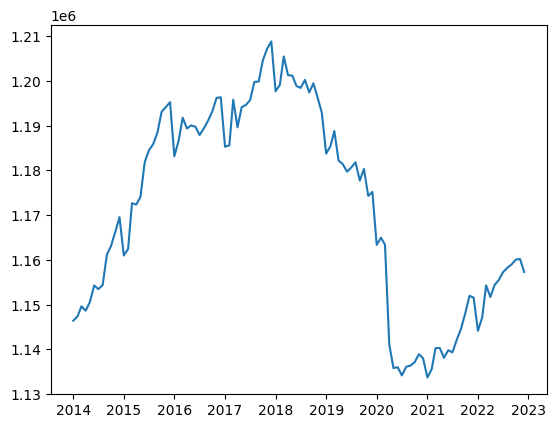

In [6]:
# Graficamos la serie de tiempo
plt.plot(data_caba.fecha, data_caba.puestos)

In [7]:
# Generamos subset de caba con el dato de cada sector o clase
data_caba_completo = data.loc[data.provincia == "CABA"]

In [26]:
# creamos una lista de sectores con mayor cantidad de puestos
top_sectore = data_caba_completo.groupby(by=["clase"]).sum().reset_index().sort_values("puestos", ascending = False).head(10).clase.to_list()

#Genero un subset para poder graficarlos
df_top_sectores = data_caba_completo[data_caba_completo.clase.isin(top_sectore)]

,fecha,departamento,provincia,clase,puestos
41,2014-01-01,CABA,CABA,Comercio al por mayor excepto autos y motos,50721
42,2014-01-01,CABA,CABA,Comercio al por menor excepto autos y motos,64097
49,2014-01-01,CABA,CABA,Servicios de expendio de alimentos y bebidas,33463
54,2014-01-01,CABA,CABA,"Servicios de programación, consultoría informá...",35173
56,2014-01-01,CABA,CABA,Servicios financieros (excepto seguros y pensi...,35642


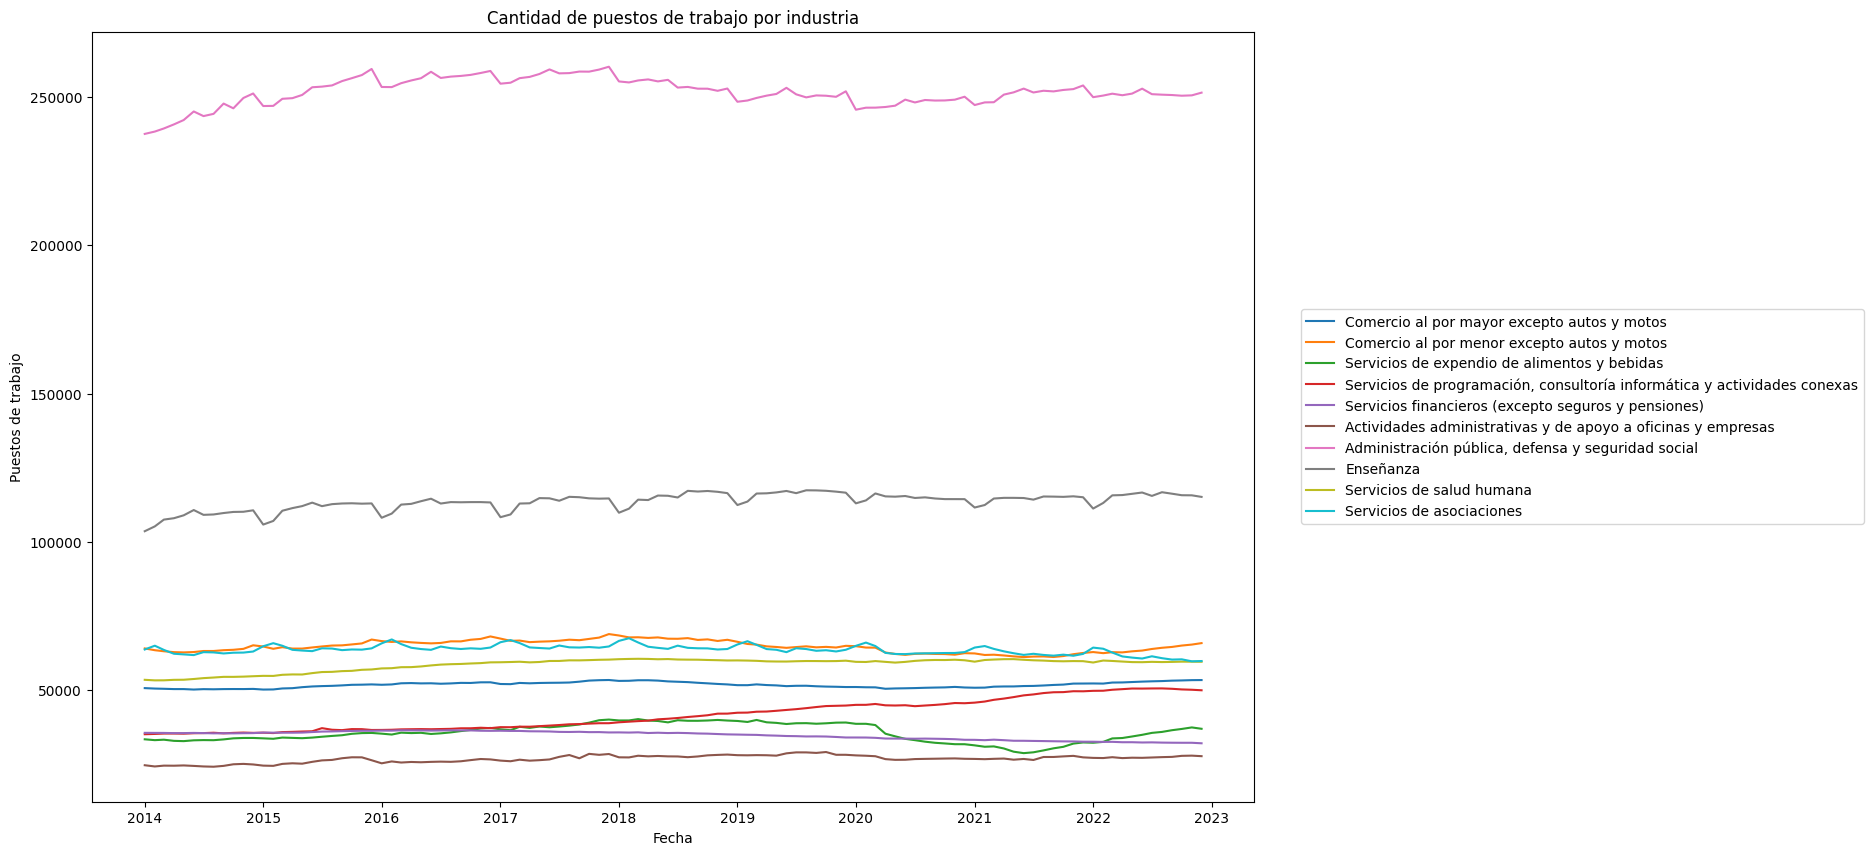

In [39]:
# Visualizar la serie de tiempo por sector
plt.figure(figsize=(15, 10))
sns.lineplot(x='fecha', y='puestos', hue='clase', data=df_top_sectores)
plt.title('Cantidad de puestos de trabajo por industria')
plt.xlabel('Fecha')
plt.ylabel('Puestos de trabajo')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()


# Feature engineering